In [3]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets    #토치 비전이란 파이토치에서 제공하는 데이터셋들이 모여 있는 패키지
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",   # root 는 학습/테스트 데이터가 저장되는 경로
    train = True,    # train 학습용 또는 테스트용 데이터셋 여부를 지정합니다
    download = True, # root 에 데이터가 없는 경우 인터넷에서 다운로드
    transform = ToTensor() # transform or target_transform 특징 or  정답의 변형을 지정   To_Tensor() 이미지를 텐서로 변경
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

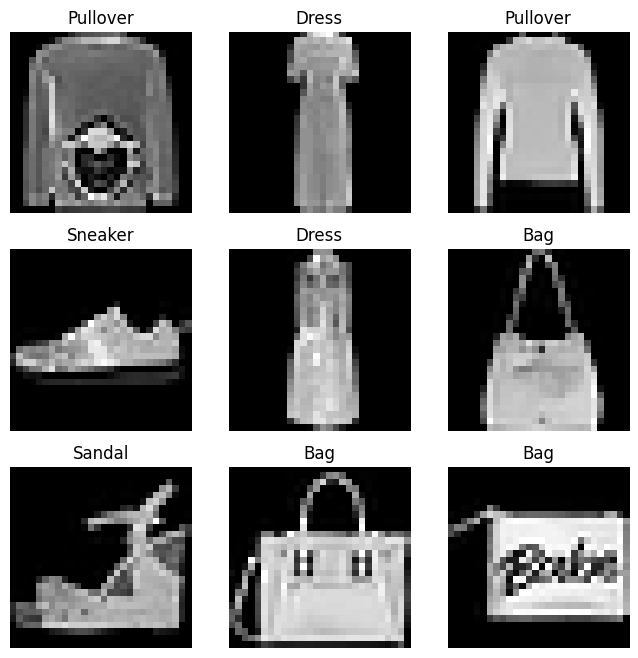

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
labels_map = {               #내장 데이터셋 정답레이블은 0-9까지 정수로 구성하기에 각 클래스의 이름 매핑
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))  # 그림을 생성하는 역할 
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(0,len(training_data), size = (1,)).item() #randint(low, high, size)  low 0은 묵시적 
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)   #figure.add_subplot(rows, cols, i) = 하나의 그림 안에 여러 개의 작은 그림을 배치 -i는 3*3 바둑판에서 몇 번째에 출력할지지
    plt.title(labels_map[label])
    plt.axis("off")   #축을 off
    plt.imshow(img.squeeze(), cmap= "gray")     #imgshow 텐서로 저장된 이미지 보여주기 #squeeze() 함수: 크기가 1인 차원 제거 = batchSize 차원 제거   #colormap = gray #imshow 텐서 형태의 이미지를 시각화화
plt.show()
print(training_data) # 데이터셋의 샘플 갯수

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

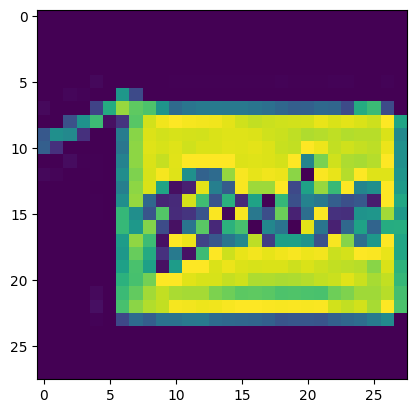

In [5]:
print(img)
print(img.size())
print(img.squeeze().size())
plt.imshow((img.squeeze()))

# 파일에서 사용자 정의 데이터셋 만들기 

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self,annotations_file,img_dir, transform = None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names= ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __geritem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])#os.path = 역슬러시  iloc = idx location
        image = read_image(img_path)
        label = sel.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)  # !!전처리한다고 했는데, 어떻게 돌아가는 건지 모름!!
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

TypeError: CustomImageDataset.__init__() missing 1 required positional argument: 'img_dir'